# Examen Parcial

Indicaciones iniciales:

a) No se evalúa la extensión de la respuesta sino la calidad de la respuesta.

b) Verifique que el código completo funciona antes de remitirlo.

c) No modificar los siguientes nombres que figuran en el archivo: X_train, X_test, y_train, y_test, el arbol de decisión (tree_clf) y el random forest (rnd).

d) Escriba el texto o código en la casilla en que se le indica.

e) Suba el notebook en la carpeta ‘Examen_Parcial’ nombrando el archivo de la siguiente forma:

‘Examen_Parcial’ + un guión bajo + su primer apellido y su primer nombre

Ejemplo: Examen_Parcial_BalbuenaJorge


# 0 Introducción

El Área de Negocios ha decidido lanzar una campaña masiva para convertir a los clientes pasivos (con depósitos a plazo) en cliente activos (con préstamos).

Para ello, ha proporcionado al Área de Analítica Avanzada una base de datos con el fin de crear un modelo que determine la probabilidad de que los clientes pasivos adquieran préstamos personales.

La base de datos incluye información demográfica de los clientes (edad, ingresos, etc.), la relación del cliente con el banco referida a sus productos financieros (hipotecas, cuentas de valores, etc.), y la respuesta de los clientes con respecto a la contratación de los préstamos.

En este contexto, la variable que indica si el cliente aceptó el préstamo personal ofrecido y o lo rechazó es la variable Personal Loan.


## Pregunta 01.1 (texto):

Complete lo siguiente:



````
*  Tipo de análisis y tipo de algoritmo:
Respuesta: Aprendisaje supervisado, paramétrico clasificación puede ser de forma preliminar como un arbol de decisión.

*  Tamaño de la muestra (número de registros/filas):
Respuesta: hay 5000 filas esto se puede visualizar con el data.shape()

*  "Número" de Features:
Respuesta: 11

*  Variable Target (si la hubiera):
Respuesta: Personal Loan

*  Métricas a evaluar:
Respuesta: Matriz de confusión, Curva Roc

````

# 1 Importamos las librerías

In [ ]:
# Importación de las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
from io import StringIO
from sklearn.tree import export_graphviz

## Pregunta 01.2 (texto en código):

El siguiente cuadro representa el listado de las columnas que figuran en la base de datos.

Complete el siguiente cuadro con el formato de las variables 1 a 10 (Categórica/Contínua).

In [ ]:
# Lista para almacenar las filas de la tabla
rows = []

# Fila 1: Cabecera
rows.append(["Índice", "Columns", "Descripciones", "Tipo de Variable"])

# Fila 2: ID
rows.append(["1", "ID", "ID del cliente", "Respuesta: cuantitativa-ordinal"])

# Fila 3: Age
rows.append(["2", "Age", "Edad del cliente en años", "Respuesta: cuatitativa-continua"])

# Fila 4: Experience
rows.append(["3", "Experience", "Años de experiencia profesional", "Respuesta: Cuantitativa-ordinal"])

# Fila 5: Income
rows.append(["4", "Income", "Ingreso anual del cliente (miles)", "Respuesta: cuantitativa-continua"])

# Fila 6: ZIPCode
rows.append(["5", "ZIPCode", "Código postal del domicilio", "Respuesta: cualitativa numérica"])

# Fila 7: Family
rows.append(["6", "Family", "Tamaño de la familia del cliente", "Respuesta: cuantitativa-ordinal"])

# Fila 8: CCAvg
rows.append(["7", "CCAvg", "Gasto promedio en tarjetas de crédito por mes (miles)", "Respuesta: Cuantitativa-continua"])

# Fila 9: Education
rows.append(["8", "Education", "Nivel de educación. 1: Pregrado; 2: Graduado; 3: Avanzado/Profesional", "Respuesta: cuantitativa-ordinal"])

# Fila 10: Mortgage
rows.append(["9", "Mortgage", "Valor de la hipoteca de la casa si la hay (miles)", "Cuantitativa-continua"])

##############################

# Fila 11: Personal Loan
rows.append(["10", "Personal Loan", "¿Aceptó este cliente el préstamo personal ofrecido en la última campaña?", "0 = No 1= Sí"])

# Filas 12 a 15 con un solo append
rows.extend([
    ["11", "Securities Account", "¿Tiene el cliente una cuenta de valores con el banco?", "0 = No 1= Sí"],
    ["12", "CD Account", "¿Tiene el cliente una cuenta de certificado de depósito (CD) con el banco?", "0 = No 1= Sí"],
    ["13", "Online", "¿Usa el cliente las instalaciones de banca por internet?", "0 = No 1= Sí"],
    ["14", "CreditCard", "¿Usa el cliente una tarjeta de crédito emitida por UniversalBank?", "0 = No 1= Sí"]
])

# Crear un DataFrame con las filas
df = pd.DataFrame(rows[1:], columns=rows[0])

# Asegurarse de que las descripciones se muestren completas
pd.set_option('display.max_colwidth', None)

# Mostrar la tabla como un DataFrame
df

,Índice,Columns,Descripciones,Tipo de Variable
0,1,ID,ID del cliente,Respuesta: cuantitativa-ordinal
1,2,Age,Edad del cliente en años,Respuesta: cuatitativa-continua
2,3,Experience,Años de experiencia profesional,Respuesta: Cuantitativa-ordinal
3,4,Income,Ingreso anual del cliente (miles),Respuesta: cuantitativa-continua
4,5,ZIPCode,Código postal del domicilio,Respuesta: cualitativa numérica
5,6,Family,Tamaño de la familia del cliente,Respuesta: cuantitativa-ordinal
6,7,CCAvg,Gasto promedio en tarjetas de crédito por mes (miles),Respuesta: Cuantitativa-continua
7,8,Education,Nivel de educación. 1: Pregrado; 2: Graduado; 3: Avanzado/Profesional,Respuesta: cuantitativa-ordinal
8,9,Mortgage,Valor de la hipoteca de la casa si la hay (miles),Cuantitativa-continua
9,10,Personal Loan,¿Aceptó este cliente el préstamo personal ofrecido en la última campaña?,0 = No 1= Sí


# 2 Importamos los datos

In [ ]:
data = pd.read_csv('/content/data_loan.csv')

Mostramos las primeras filas de la tabla.

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Mostramos el tamaño de la tabla.

In [ ]:
data.shape

(5000, 14)

# 3 EDA - Análisis Univariante

Imprimiremos la información básica de la base de datos.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Pregunta 03.1 (código):



````
Pregunta:

Obtenemos el resumen estadístico de la base de datos.
````

In [ ]:
# Respuesta:
data.describe()
# (no elimine esta celda)

# Escriba el código

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


A partir del resumen estadístico indique lo siguiente:

## Pregunta 03.2 (texto):


````
Pregunta:
¿A priori detecta errores en alguna(s) de las primeras 5 variables?
Si es así, ¿cómo sugeriría que se traten dichos errores (por ejemplo, eliminarlos, reemplazarlos por la media o la mediana)?
````

````
# Respuesta: Se puede ver un claro error en la variable Experience porque el mínimo data -3. Como es que alguien debe años de experiencia.
# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 3 líneas)

````

## Pregunta 03.3 (texto y código):

```
Preguntas:

¿A priori, considera que todas las variables listadas podrían aportar información relevante al modelo?
Sustente su respuesta.

Si hubiera alguna variable(s) que considera no relevante, ¿qué tratamiento realizaría sobre dicha variable(s)?
Sustente su respuesta.
```

````
# Respuesta: Las variabes que no aportan son las siguientes: 1. ID-> No es necesaria la pocisión relativa del dato en la muestra.
# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 3 líneas)

````

In [ ]:
# Respuesta:


var=['ID']
data = data.drop(var, axis=1)
# (no elimine esta celda)

# Escriba el código con el tratamieto para la variable(s) correspondiente.

In [ ]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Verificamos cuántos valores nulos existen en el dataframe.

In [ ]:
# ejecute el código sin modificar

# Contamos los valores nulos en el dataframe
null_counts = data.isnull().sum()

# Imprimimos la cantidad de valores nulos
print(null_counts)

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


Para analizar las diferentes variables de la base de datos se pueden utilizar diversas visualizaciones adecuadas tanto para variables continuas como categóricas.

## Pregunta 03.04 (texto):

```
Pregunta:

¿Qué tipo de gráfica realizaría para analizar las variables contínuas y las variables categóricas?

Detalle qué gráficas realizararía para cada tipología de variables.

(Menciones 2 tipos de visualizaciones para las variables contínuas y 1 tipo para las variables categóricas)
````

````
# Respuesta: Se pueden usar histogramas y boxplots para conocer outlier o casos atípicos en continuas. En el caso de las categóricas es mejor un countplot para poder ver la frecuencia de las categorías.

```
# Esto tiene formato de código
```


# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 4 líneas)
````

# 3.1 Variables Explicativas (parte 1)

## Pregunta 03.05 (texto en código):

Incorpore el listado de variables explicativas correspondiente para los siguientes tipos de gráficas:

In [ ]:
# Respuesta:
# (no elimine esta celda)

# Escriba el listado de variables en este código.
# El siguiente código empleará este listado de variables para realizar una serie de gráficas.
# (no modifique el nombre de la lista : "vars1")
vars1 = ['Age', 'Experience', 'CCAvg', 'Mortgage', 'Income']

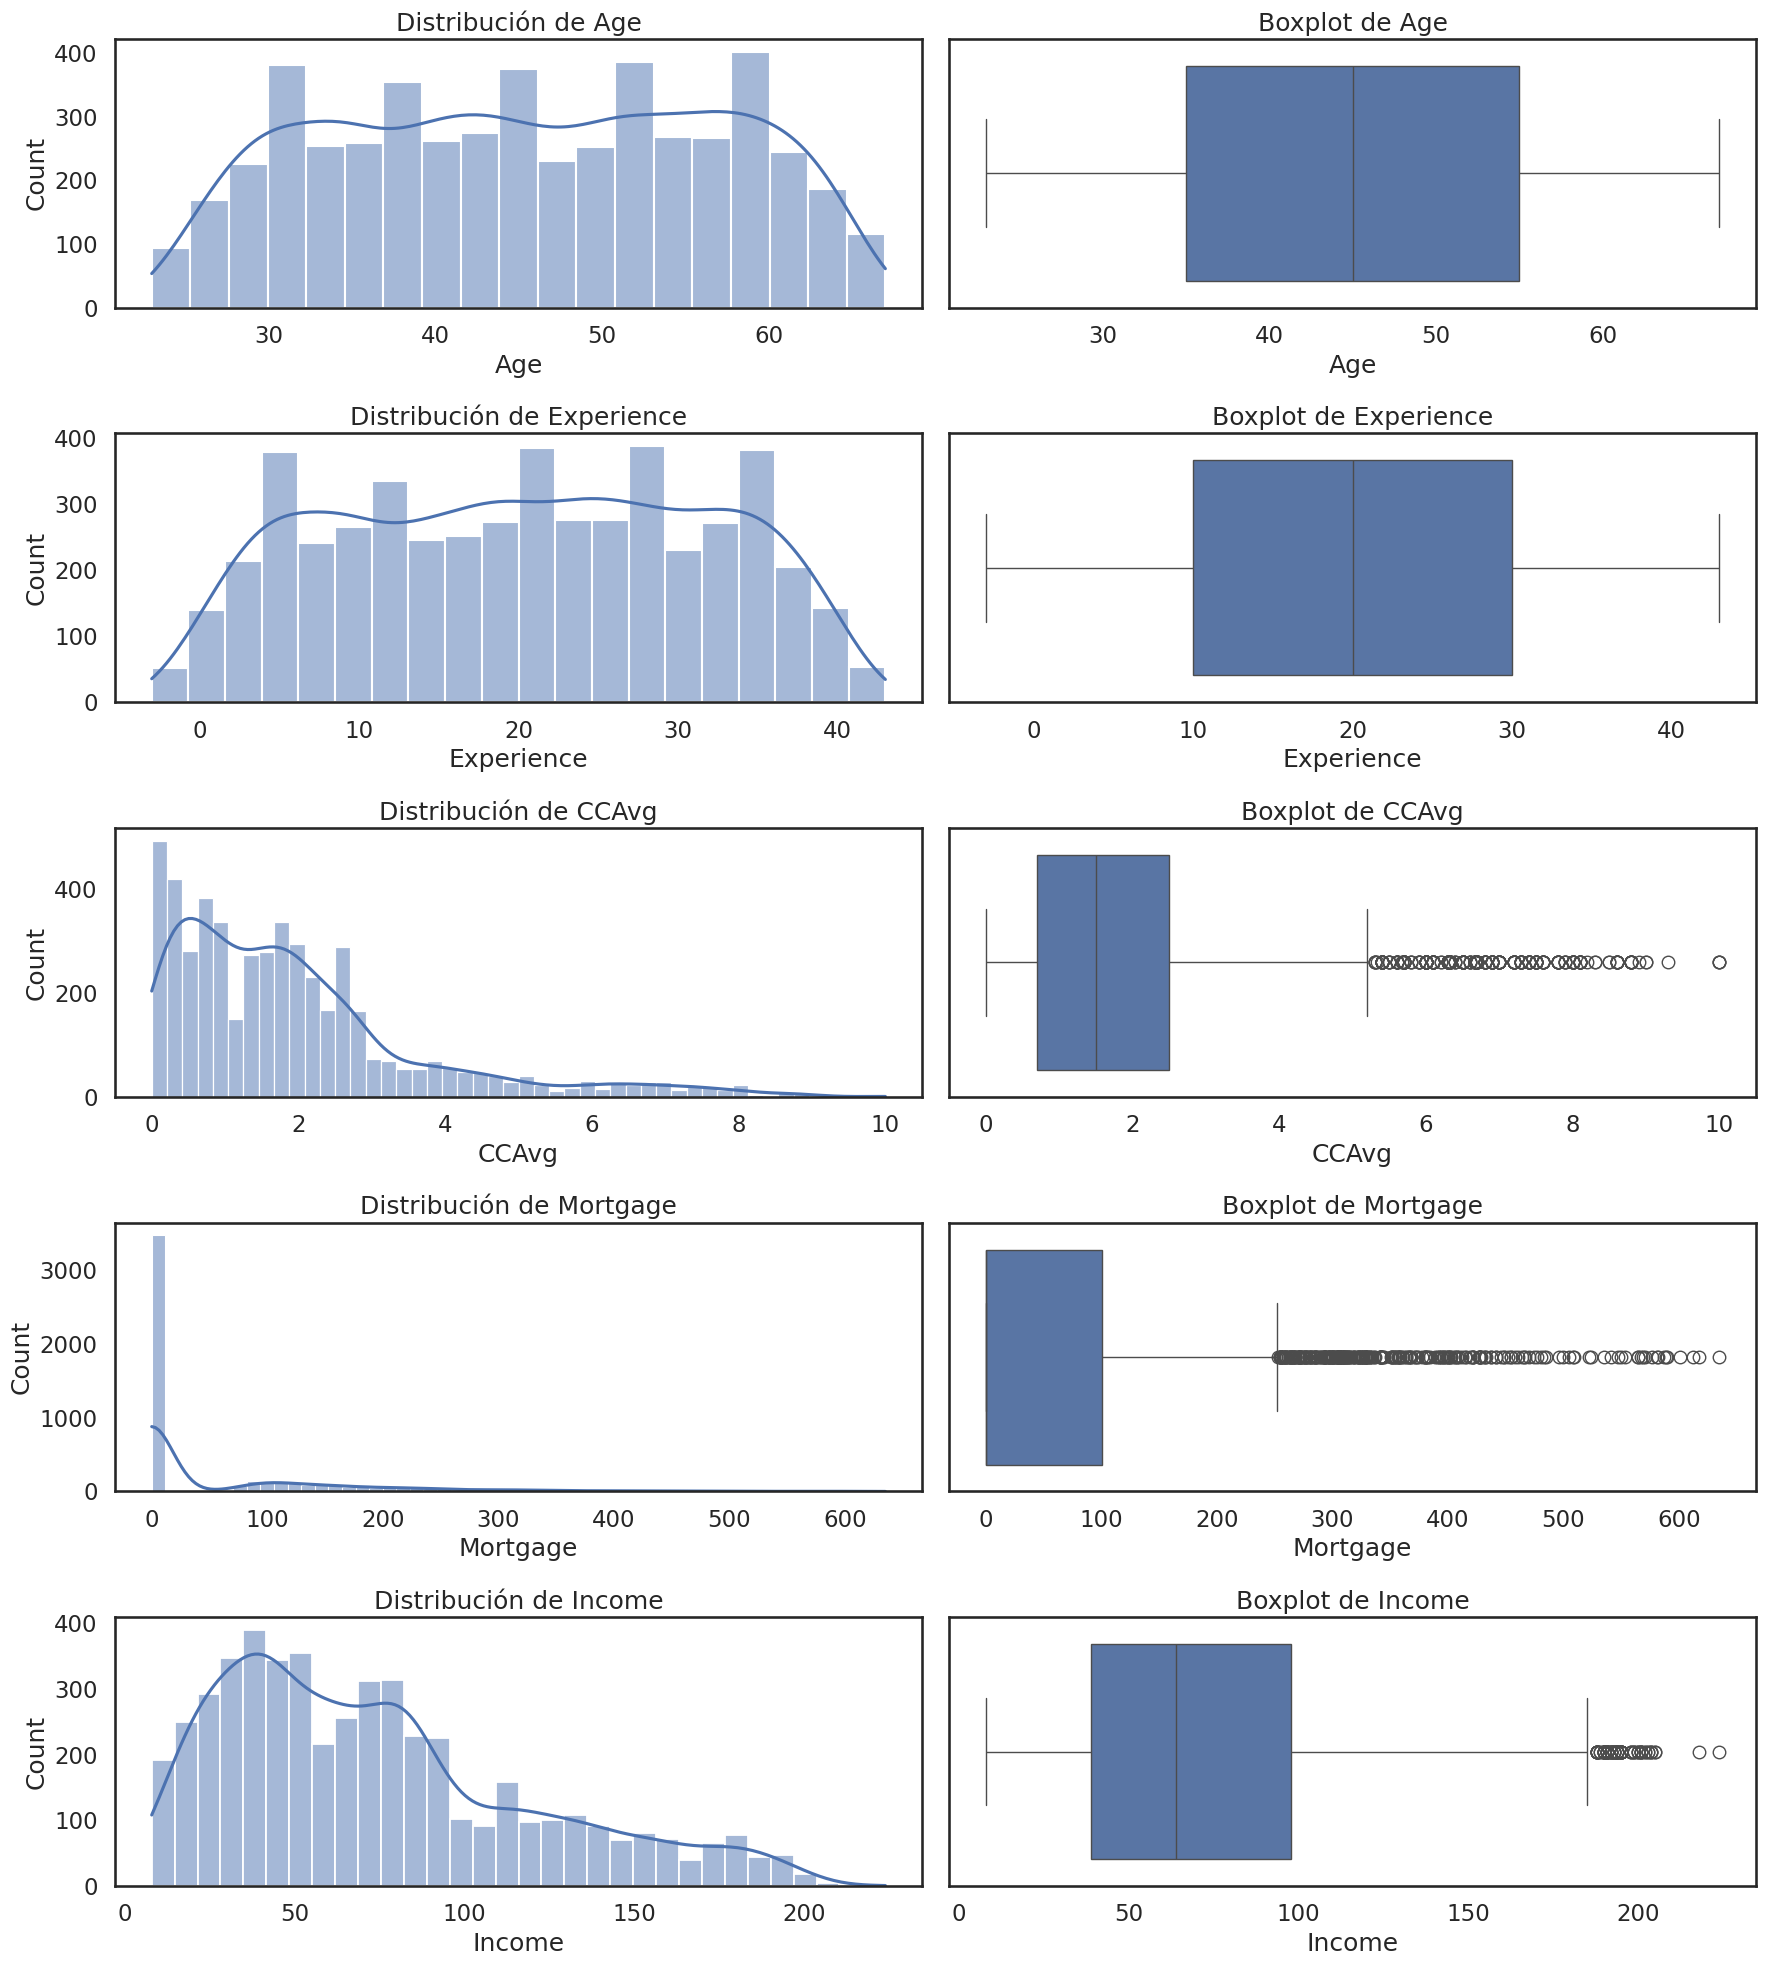

In [ ]:
# ejecute el código sin modificar
sns.set(style="white")
sns.set_context("talk")

fig, axes = plt.subplots(len(vars1), 2, figsize=(18, len(vars1) * 4))

for i, var in enumerate(vars1):

    sns.histplot(data[var], kde=True, ax=axes[i, 0]) ########### gráfica
    axes[i, 0].set_title(f'Distribución de {var}')

    sns.boxplot(x=data[var], ax=axes[i, 1])  ########### gráfica
    axes[i, 1].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


 ## Pregunta 03.06 (texto):

````
# Pregunta:

Teniendo en cuenta las gráficas impresas en el paso anterior:
¿Observa la presencia de valores atípicos (outliers)? ¿A partir de que tipo de gráficas los detecta y cómo los detecta?.
(Emplee terminología técnica para dar su respuesta).

````




```
# Esto tiene formato de código
```

````
# Respuesta: Si hay presencia de outliers. Estas se detectan en los boxplots de la derecha. Son los puntos que exceden las colas de la distribución.

# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 2 líneas)
````

## Pregunta 03.07 (texto):

````
# Pregunta: Se observa una distribución alada a la izquierda para el caso de Income. En el caso de Mortagage es más severa por los valores de 0 en la gran mayoría de datos. Por otro lado, experience y edad tienen una distribución normal puesto que son variables que tienen un rango definido en la recolección de datos. Además, el hecho de que sean categóricas normaliza la distribución de las variables.



¿Describa que tipo de distribución observa y si hay presencia de valores atípicos en las variables Experience , Income y Mortgage?
(Emplee terminología técnica para dar su respuesta).
````

# 3.2 Variables Explicativas (parte 2)

## Pregunta 03.08 (texto en código):

In [ ]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Incorpore el listado de variables explicativas correspondientes los siguientes tipos de gráfica:

In [ ]:
# Respuesta:
# (no elimine esta celda)

# Escriba el listado de variables en este código.
# El siguiente código empleará este listado de variables para realizar una serie de gráficas.
# (no modifique el nombre de la lista : "vars2")
vars2 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

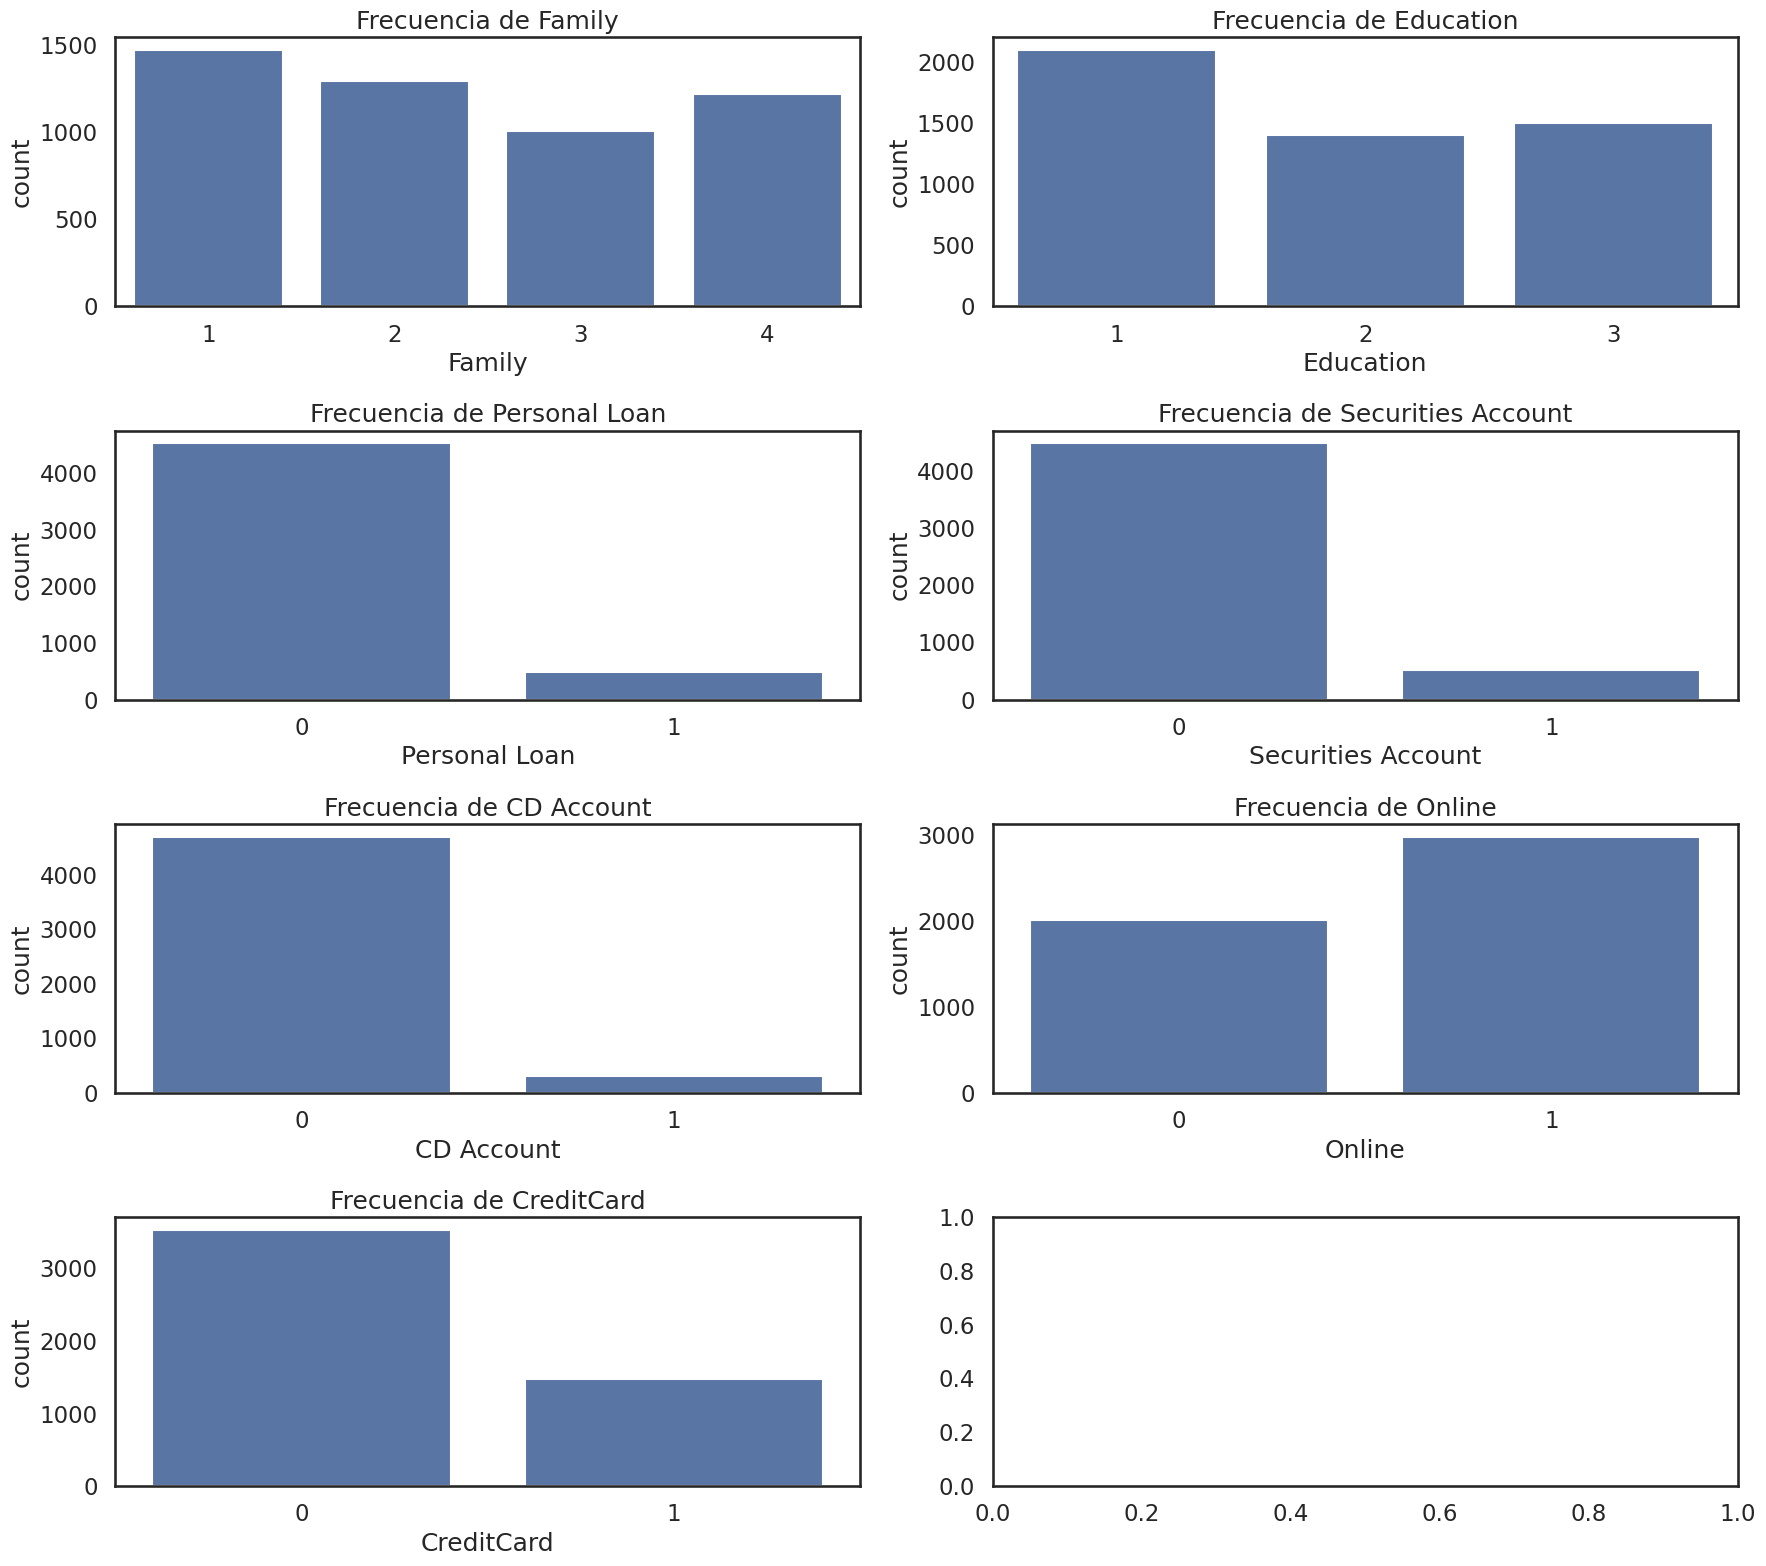

In [ ]:
# ejecute el código sin modificar
fig, axes = plt.subplots((len(vars2) + 1) // 2, 2, figsize=(18, ((len(vars2) + 1) // 2) * 4))

for i, var in enumerate(vars2):
    row = i // 2
    col = i % 2
    sns.countplot(x=var, data=data, ax=axes[row, col]) ################## gráfica
    axes[row, col].set_title(f'Frecuencia de {var}')

plt.tight_layout()
plt.show()

# 3.3 Variable Objetivo

<ipython-input-19-2c39c0e8a642>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Personal Loan', y='Percentage', data=target_percentages, palette='viridis')


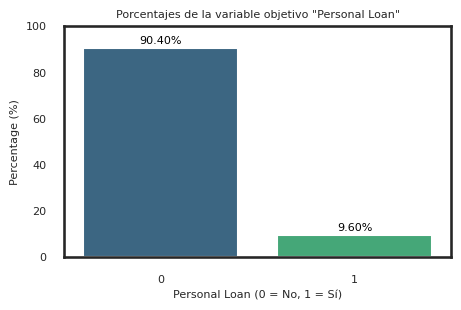

In [ ]:
# ejecute el código sin modificar
# Calculamos los porcentajes de cada categoría en la siguiente variable
target_counts = data['Personal Loan'].value_counts(normalize=True) * 100
target_percentages = target_counts.reset_index()
target_percentages.columns = ['Personal Loan', 'Percentage']

# Creamos gráfica de barras
plt.figure(figsize=(5, 3))  # Tamaño más pequeño de la figura
sns.barplot(x='Personal Loan', y='Percentage', data=target_percentages, palette='viridis')
plt.title('Porcentajes de la variable objetivo "Personal Loan"', fontsize=8)
plt.xlabel('Personal Loan (0 = No, 1 = Sí)', fontsize=8)
plt.ylabel('Percentage (%)', fontsize=8)

# Ajustamos el tamaño de los valores del eje x e y
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Mostramos los valores en la parte superior de cada barra, separados de las barras
for index, row in target_percentages.iterrows():
    plt.text(row['Personal Loan'], row['Percentage'] + 2, f'{row["Percentage"]:.2f}%', color='black', ha="center", fontsize=8)  # Ajuste de posición y tamaño de fuente

plt.ylim(0, 100)  # Ajustar el límite del eje y para que los textos no se superpongan
plt.show()

import warnings

# Suprimir las advertencias

warnings.filterwarnings('ignore')

## Pregunta 03.09 (texto):

````
Pregunta: Definitivamente hay un gran desbalance. La mayoría de agentes no cuenta con gastos en targetas de crédito. Tampoco aceptaron un prestamo personal en la última campaña. No tienen Cuentas de valores con el banco en la gran mayoría. Entonces se puede deecir que la muestra está sesgada a no ser adquientes de pasivos.

Teniendo en cuenta la información anterior.
¿Considera que la base es balanceada o desbalanceada?  
¿Esto tendrá alguna afectación sobre la generación del modelo?
Justifique su respuesta.

````


# EDA - Análisis bivariante

Estudiaremos la relación entre pares de variables.

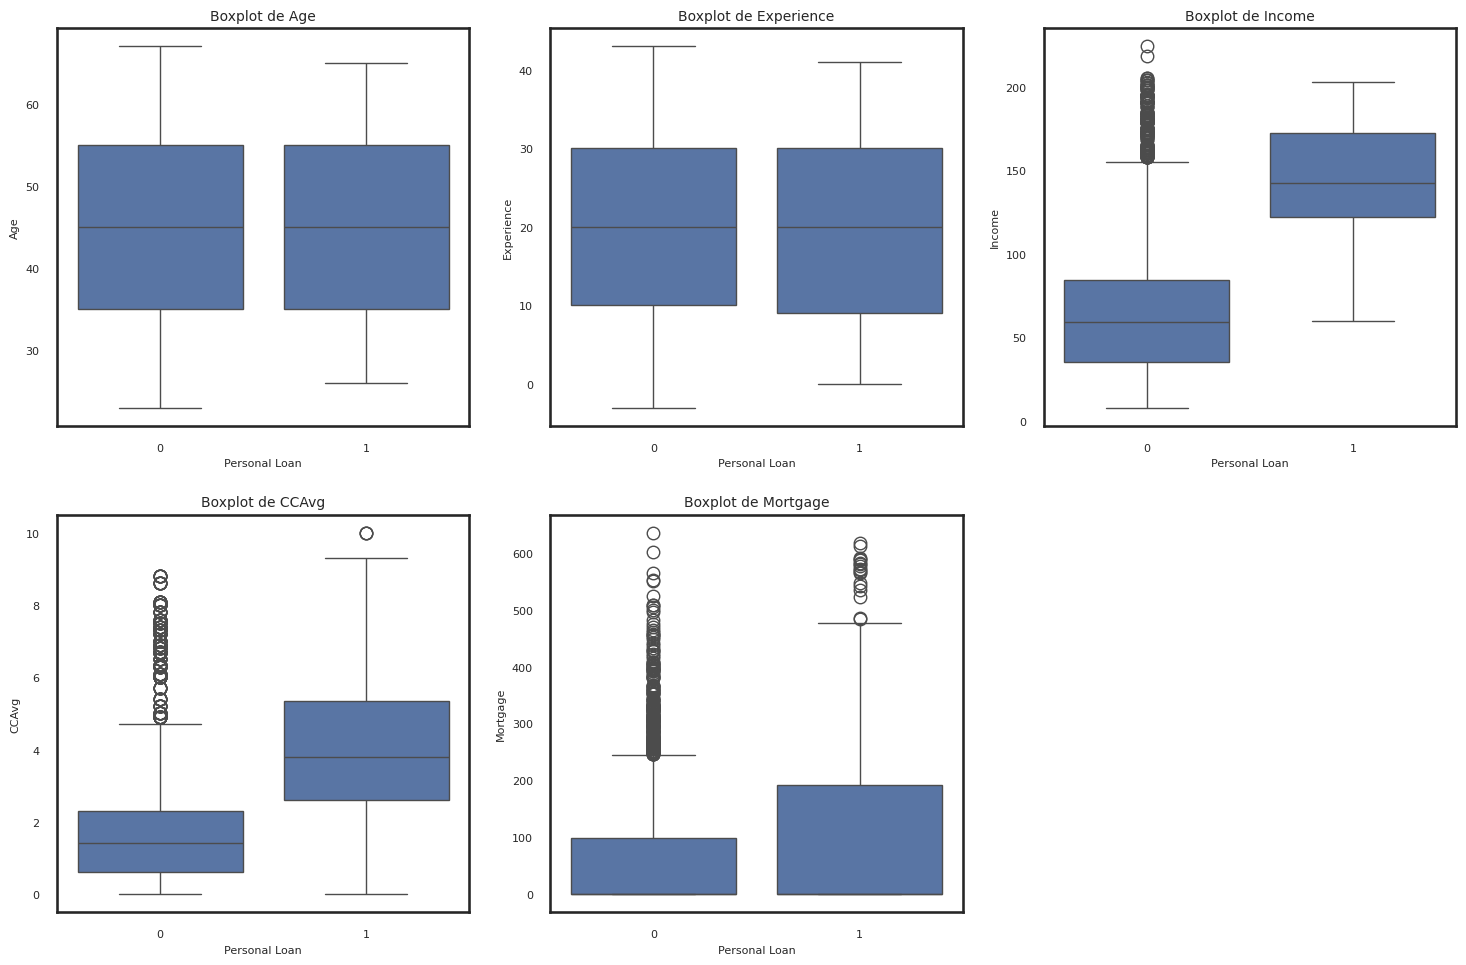

In [ ]:
# ejecute el código sin modificar
variables = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Personal Loan', y=var, data=data)
    plt.title(f'Boxplot de {var}', fontsize=10)
    plt.xlabel('Personal Loan', fontsize=8)
    plt.ylabel(var, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

## Pregunta 03.10 (texto)

````
Pregunta:

Considerando la gráfica anterior:

¿Cuáles de las variables anteriores considera útiles y relevantes para predecir la aceptación del préstamo personal?

Las variables más relevantes son las que tienen mayor variablilidad porque aportan información al modelo y estas son: CCAvg -que tenga mayor historial de crédito es importante, por eso los gastos en targetas de crédito importan-, Income -super importante si el individuo presenta mayor liquidez porque tiene mayores ingresos-, Mortagage -importante que se haya tenido un historial de crédito, así las personas conocen la importancia del apalancamiento y están acostumbrados a este-.

¿Cuáles de las variables anteriores no considera útiles y relevantes para predecir la aceptación del préstamo personal?

Se puede ver que la variable de edad y experiencia no aportan información para el modelo puesto que los valores diferenciados en cuestión de adquirir un préstamo muestran la misma distribución.

Detalle su justificación para cada variable (emplee terminología técnica considerando lo que observa en las gráficas).



````

#EDA - Análisis de subpoblaciones

Realizaremos un análisis descriptivo a partir de la población total y a partir de 2 subpoblaciones.



* ¿Cuál es la edad promedio en este conjunto de datos?
45.5
* ¿Qué porcentaje de clientes tienen tarjetas de crédito?
29.4
* ¿Qué porcentaje de clientes aceptó el préstamo personal?
9.6

In [ ]:
# ejecute el código sin modificar
# Calculamos e imprimimos la edad promedio
average_age = data['Age'].mean()
print("La edad promedio es:", average_age)

# Calculamos e imprimimos el porcentaje de clientes con tarjetas de crédito
credit_card_percentage = (data['CreditCard'].sum() / len(data)) * 100
print("El porcentaje de clientes con tarjetas de crédito es:", credit_card_percentage)

# Calculamos e imprimimos el porcentaje de clientes que aceptaron el préstamo personal
personal_loan_percentage = (data['Personal Loan'].sum() / len(data)) * 100
print("El porcentaje de clientes que aceptaron el préstamo personal es:", personal_loan_percentage)

La edad promedio es: 45.3384
El porcentaje de clientes con tarjetas de crédito es: 29.4
El porcentaje de clientes que aceptaron el préstamo personal es: 9.6


Intentaremos ver las diferencias entre dos subpoblaciones.

In [ ]:
# ejecute el código sin modificar
# Creamos dos dataframes para las dos subclases:
personalloans = data[data['Personal Loan'] == 1]
no_personalloans = data[data['Personal Loan'] == 0]

In [ ]:
# ejecute el código sin modificar
mean_income = personalloans['Income'].mean()
mean_cc_avg = personalloans['CCAvg'].mean()

print("Renta media de los clientes que 'adquirieron' préstamos personales:", mean_income)
print("Gasto medio con tarjeta de crédito de los clientes que 'adquirieron' con préstamos personales:", mean_cc_avg)

Renta media de los clientes que 'adquirieron' préstamos personales: 144.74583333333334
Gasto medio con tarjeta de crédito de los clientes que 'adquirieron' con préstamos personales: 3.905354166666667


In [ ]:
# ejecute el código sin modificar
mean_income = no_personalloans['Income'].mean()
mean_cc_avg = no_personalloans['CCAvg'].mean()

print("Renta media de los clientes que 'no adquirieron' préstamos personales:", mean_income)
print("Gasto medio con tarjeta de crédito de los clientes que 'no adquirieron' préstamos personales:", mean_cc_avg)

Renta media de los clientes que 'no adquirieron' préstamos personales: 66.23738938053097
Gasto medio con tarjeta de crédito de los clientes que 'no adquirieron' préstamos personales: 1.7290088495575222


## Pregunta 03.11 (texto)

````
Pregunta:
¿ Qué observa a partir de los resultados anteriores? ¿Considera que es relevante para los posteriores análisis?
````

[texto del vínculo](https://)````
# Respuesta: Las variables de Income es muy importante porque a mayor ingreso, mayor adquisición de préstamos. Lo mismo con la variable CCAvg mayor adquicisión de prestamos personales en las personas que gastan más en tarjetas de crédito.
# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 6 líneas)
````

# EDA - Análisis de correlaciones

Utilizaremos la matriz de correlaciones para identificar y cuantificar las relaciones entre variables.

## Pregunta 03.12 (código)

````
# Pregunta:
# Calcule la matriz de correlaciones.
````

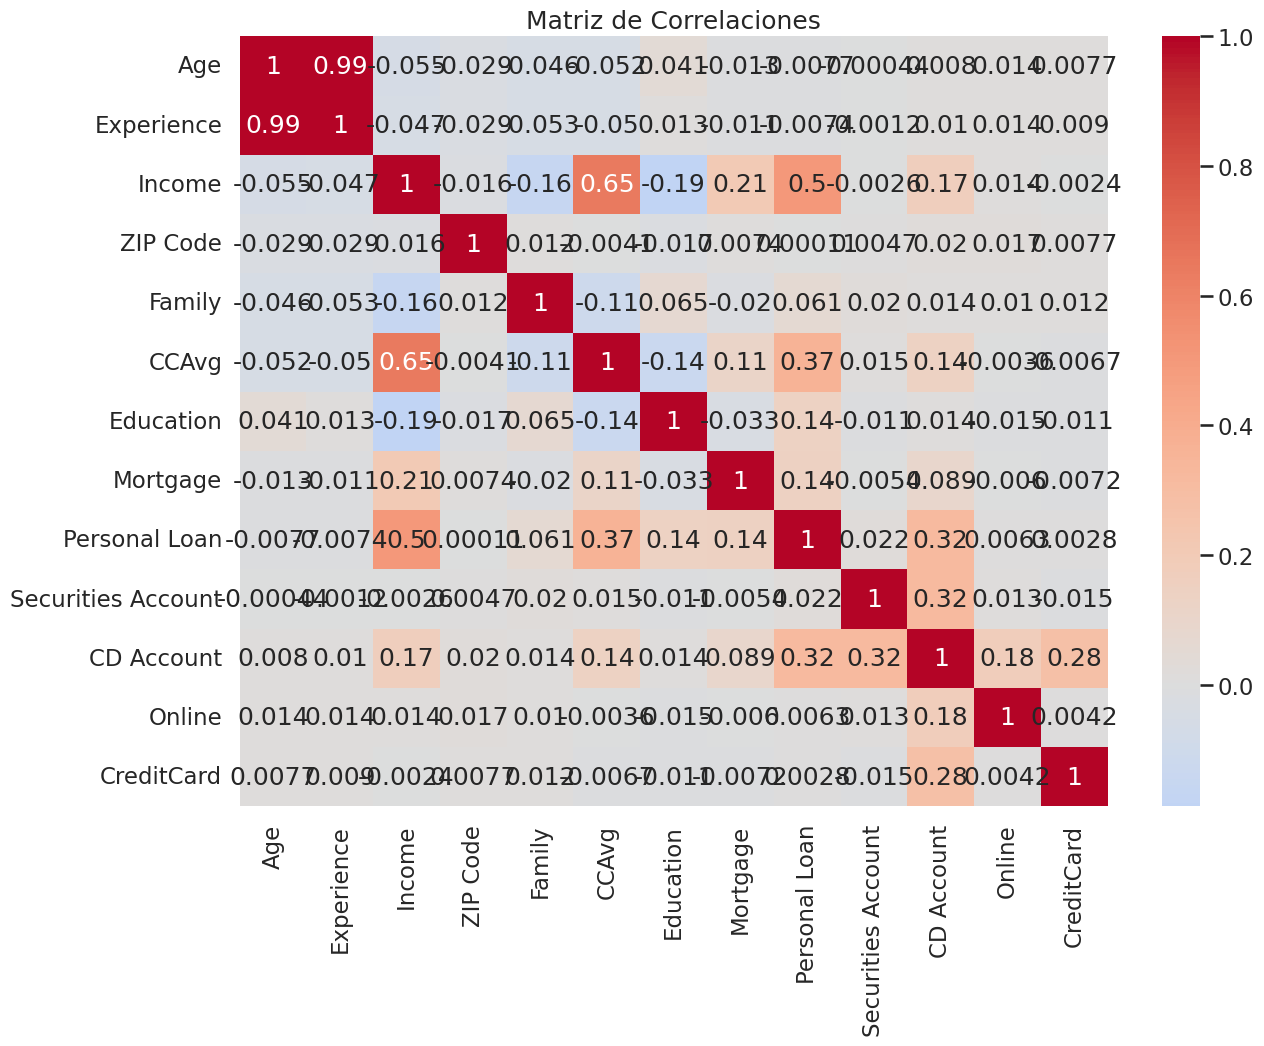

In [ ]:
# Respuesta:
corr_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones')
plt.show()

# (no elimine esta celda)

# Escriba el código

## Pregunta 03.13 (texto)

````
Pregunta:

¿Qué observa a partir de los resultados anteriores? ¿A partir de qué que umbral considera altas correlaciones?
¿Cuáles son las variables con correlaciones más altas?
¿Qué criterios consideraría para eliminar una de las variables correlacionadas en cada par?

Comente (máximo en 5 líneas)
````



```
# Esto tiene formato de código
```

````
# Respuesta:

#El umbral sería de 0.5 para decir que la correlción es media. La mayoría de las correlaciones son positivas.
#Las variables con correlaciones altas son CCAvg e Income (0.65), Experience y Edad generan colinealidad porque entre ellas hay correlación alta. Sin embargo, no es relevante el criterio para el modelo de clasificación.
#El criterio sería la correlación con Personal loan, algunas correlaciones son muy insignificantes.
# (no elimine esta celda)


# Escriba el texto correspondiente (máximo 6 líneas)
````

# 4 Preparamos la data antes de entrenar el modelo

In [ ]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Nos aseguramos de que no hayan variables de tipo string ni que incluyan valores Nan. Si las hubiera habría que darles el tratamiento correspondiente.

In [ ]:
# Verificar variables de tipo string
variables_string = data.select_dtypes(include='object').columns
if len(variables_string) > 0:
    print("Variables de tipo string encontradas:")
    print(variables_string)
else:
    print("No se encontraron variables de tipo string.")

# Verificar variables con valores NaN
variables_con_nan = data.columns[data.isna().any()].tolist()
if len(variables_con_nan) > 0:
    print("Variables con valores NaN encontradas:")
    print(variables_con_nan)
else:
    print("No se encontraron variables con valores NaN.")

No se encontraron variables de tipo string.
No se encontraron variables con valores NaN.


## Pregunta 04.1 (código)


````
Pregunta:

Escriba el código para dividir la base de datos en train y test () considerando una partición 80/20.

Considere los siguiente nombres para las submuestras generadas: X_train, y_train, X_test, y_test.shape.

````

In [ ]:
# Respuesta:
# (no elimine esta celda)

# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1812)
# Escriba el código

In [ ]:
# no modificar el código
# Imprimimos la forma de los conjuntos de entrenamiento y prueba
print('Forma de X_train:', X_train.shape)
print('Forma de y_train:', y_train.shape)
print('Forma de X_test:', X_test.shape)
print('Forma de y_test:', y_test.shape)

Forma de X_train: (4000, 12)
Forma de y_train: (4000,)
Forma de X_test: (1000, 12)
Forma de y_test: (1000,)


# 5 Empezamos a construir nuestro modelo base


## Pregunta 05.1 (código)

````
Pregunta:

Iniciaremos ajustando un decisión tree con una profundidad (depth) de 5 niveles para tenerlo como referencia a nivel de métricas y realizaremos su representación gráfica.
Nombre el algoritmo: tree_clf

````

In [ ]:
# Respuesta:
# (no elimine esta celda)

# Crear y entrenar el modelo : complete el código, no modifique el nombre tree_clf.
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=1812)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1812)

[Text(0.5669642857142857, 0.9166666666666666, 'Income <= 113.5\ngini = 0.175\nsamples = 4000\nvalue = [3613, 387]'),
 Text(0.3125, 0.75, 'CCAvg <= 2.95\ngini = 0.041\nsamples = 3221\nvalue = [3153, 68]'),
 Text(0.10714285714285714, 0.5833333333333334, 'Income <= 106.5\ngini = 0.007\nsamples = 2985\nvalue = [2974, 11]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.0\nsamples = 2912\nvalue = [2912, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'Family <= 3.5\ngini = 0.256\nsamples = 73\nvalue = [62, 11]'),
 Text(0.07142857142857142, 0.25, 'Education <= 2.5\ngini = 0.137\nsamples = 54\nvalue = [50, 4]'),
 Text(0.03571428571428571, 0.08333333333333333, 'gini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(0.10714285714285714, 0.08333333333333333, 'gini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.21428571428571427, 0.25, 'Experience <= 3.5\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.17857142857142858, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue

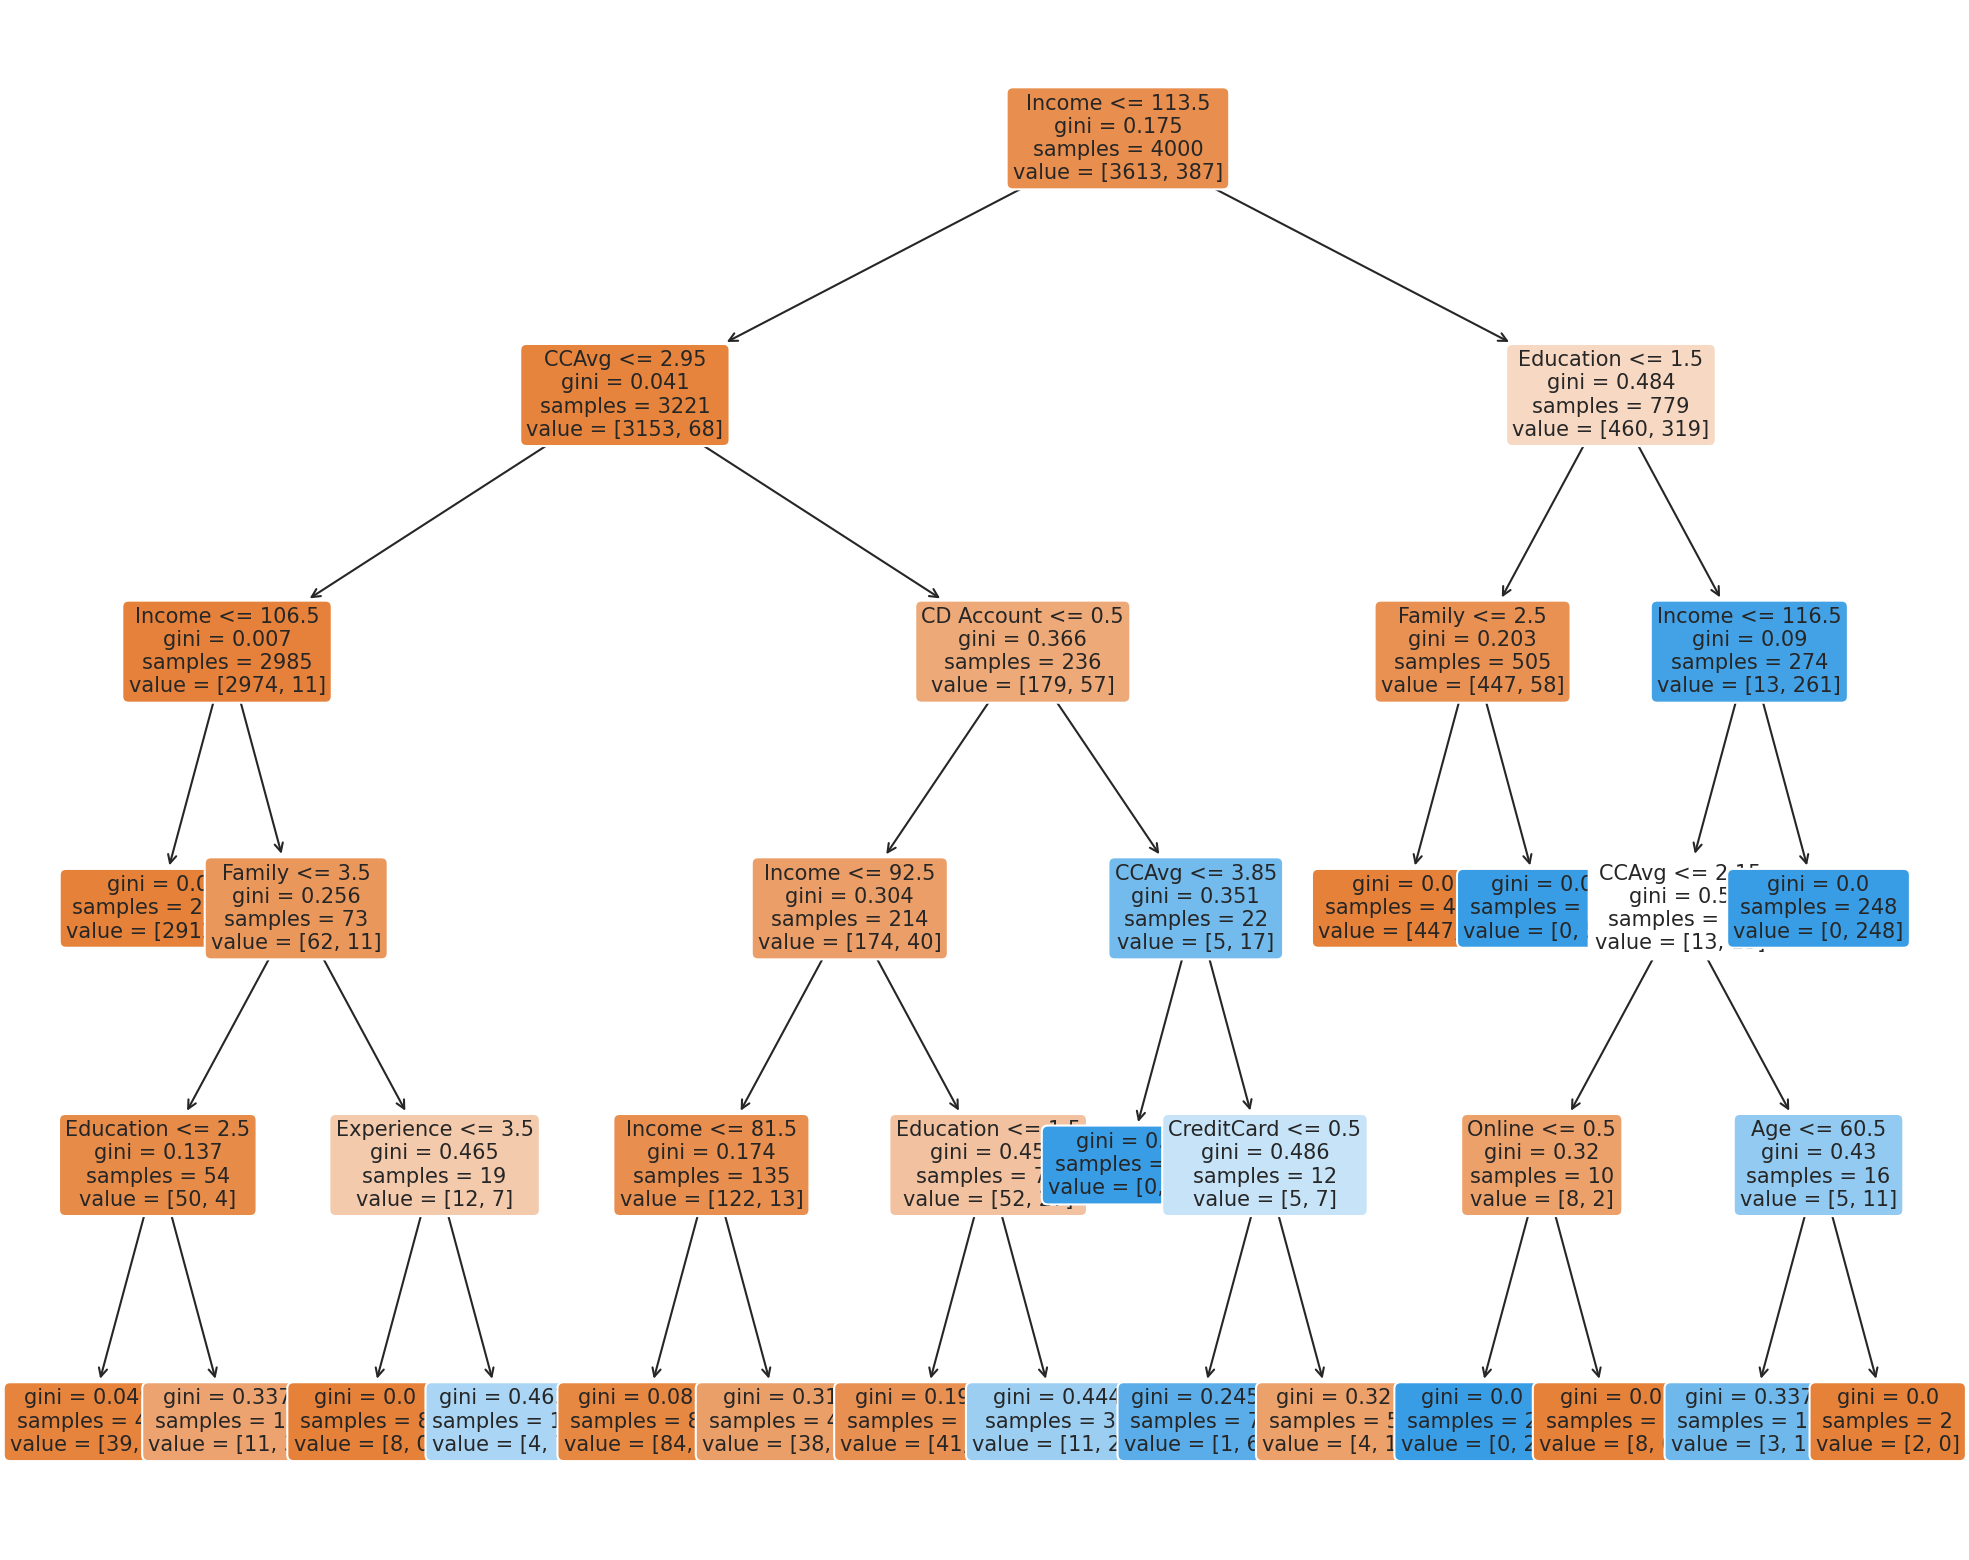

In [ ]:
# Respuesta:
from sklearn import tree
# (no elimine esta celda)
plt.figure(figsize=(25,20))
tree.plot_tree(tree_clf,max_depth=5, feature_names=X_train.columns,filled=True, rounded=True,  fontsize=15)
# Escriba el código de visualización

## Pregunta 05.2 (texto)

````
Pregunta:

¿Qué representa el valor del nodo (value = [46, 1])?
¿Cómo se puede comparar la impureza entre los nodos? (emplee términos técnicos).

````

````
# Respuesta:
#La cantidad de valores que concuerdan con la carácterística es 46 y una no cumple.
#La pureza o impureza se mide mediante el gini. Es más puro si el valor de este dato es menor.

# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 4 líneas)
````

## Pregunta 05.3 (texto)

````
Pregunta:

¿Cómo influye la profundidad del árbol en la complejidad y la capacidad de generalización de este modelo en particular?
¿Habría beneficios o desventajas?

````

Importa que sea profundo porque habría mayor selección lo cual es ventajoso. Si hay poca profundidad pues hay poco control de la variabilidad de los datos. Por otro lado, si hay una alta profundidad entonces puede ser un modelo sobreajustado.


# 6 Desarrollaremos un modelo más complejo

Los árboles de decisión son inestables y sensibles a pequeñas variaciones en los datos. Por lo tanto, desarrollaremos un modelo empleando un algoritmo random forest que promedia varios árboles de decisión. Esto debería darnos un modelo más robusto.

## Pregunta 06.1 (código)

````
Pregunta:

Elabore un modelo empleando el algoritmo de random forest considerando el siguiente diccionario de hiperparámetros y un cv = 3.

# n_estimators : 100,150,200
# max_leaf_nodes : 12,14,16
#  max_features : 5,6,7,8

Nombre el algoritmo: rnd
````

In [ ]:
# Respuesta:
# (no elimine esta celda)
rnd = RandomForestClassifier(random_state=1812)

## dicionario de hiperparámetros
param_grid_rnd = {'n_estimators':[100,150,200],
             'max_leaf_nodes':[12,14,16], #
              'max_features':[5,6,7,8]} #

## implementación de grid search
grid_search_rnd = GridSearchCV(rnd,param_grid_rnd,cv=3,return_train_score=True)
grid_search_rnd.fit(X_train,y_train)

print(f'Grid Search CV train set score: {grid_search_rnd.score(X_train,y_train)}')
print(f'Grid Search CV test set score: {grid_search_rnd.score(X_test,y_test)}')
print(f'Grid Search CV best parameters: {grid_search_rnd.best_params_}')

print(f'Grid Search CV best cross-validation score: {grid_search_rnd.best_score_}')
print(f'Grid Search CV best estimator: {grid_search_rnd.best_estimator_}')
# Escriba el código

Grid Search CV train set score: 0.98925
Grid Search CV test set score: 0.984
Grid Search CV best parameters: {'max_features': 6, 'max_leaf_nodes': 16, 'n_estimators': 200}
Grid Search CV best cross-validation score: 0.9850005604849489
Grid Search CV best estimator: RandomForestClassifier(max_features=6, max_leaf_nodes=16, n_estimators=200,
                       random_state=1812)


## Pregunta 06.2 (texto)


````
Pregunta:

Indique cuales son los mejores parametros obtenidos. Explique a qué haría referencia cada uno con sus propias palabras.
(Máximo 6 líneas)


Además comente si en en lugar de realizar una asignacion manual de hiperparámetros cuenta con otras alternativas para asignarlos. Señale pros y contras de cada alternativa.
(Máximo 2 líneas)

la alternativa es precisamente el método heurístico de probar los mejores hiperparámetros.

````

````
# Respuesta: La mejor combinación de buenos parámetos considerando el cross validation de 3.Se tiene que con 200 estimadores, 16 nodos y 6 variables.
# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 8 líneas)
````

# 7 Entrenamos el modelo más complejo con los hiperparámetros seleccionados.


## Pregunta 07.1 (código)

In [ ]:
# Respuesta:
# (no elimine esta celda)

# Crear y entrenar el modelo : complete el código.
rnd = RandomForestClassifier(max_features=6, max_leaf_nodes=16, n_estimators=200,
                       random_state=1812)
rnd.fit(X_train, y_train)

RandomForestClassifier(max_features=6, max_leaf_nodes=16, n_estimators=200,
                       random_state=1812)

## Pregunta 07.2 (código)

Graficamos la curva roc y  matriz de confusion con etiquetas (valores reales y predichos) del arbol de decisión (tree_clf) y del random forest (rnd).

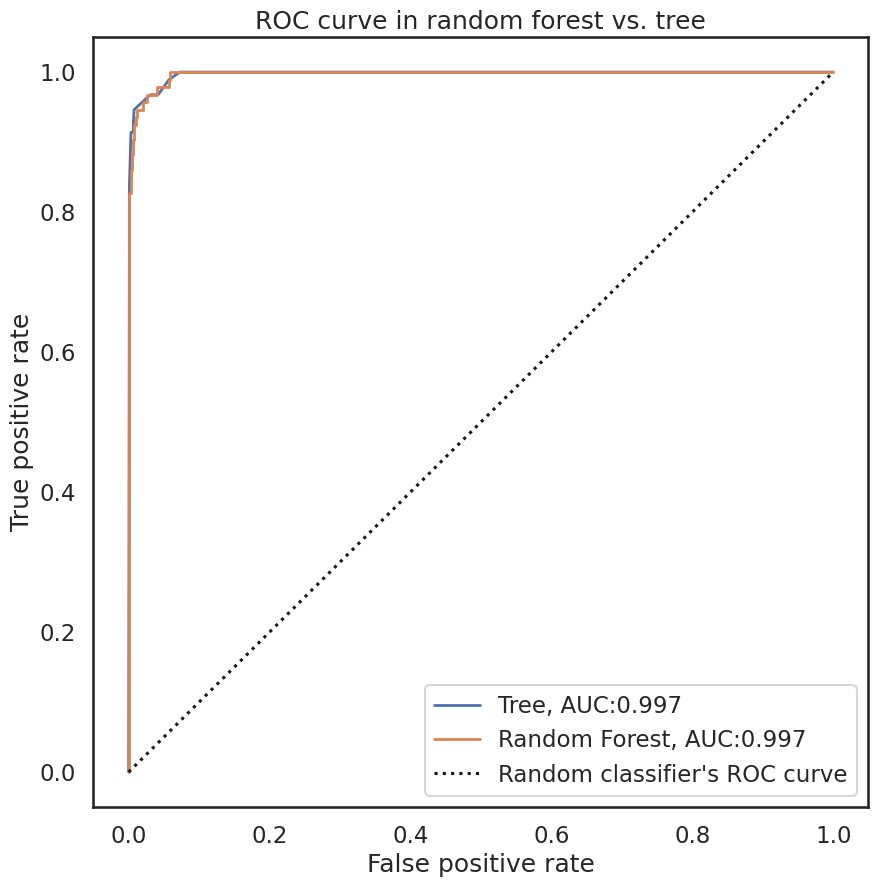

In [ ]:
# Respuesta:
# (no elimine esta celda)

# Escriba el código
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
#Probabilidades
proba_tree = tree_clf.predict_proba(X_test)[:,1]
proba_rndfor = rnd.predict_proba(X_test)[:,1]
#curva roc y las probabilidades
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, proba_tree)
#Para el random forest
fpr_rndfor, tpr_rndfor, thresholds_rndfor = roc_curve(y_test, proba_rndfor)
#Configuración del gráfico
plt.figure(figsize=(10,10))
# graficamos las curvas ROC para cada modelo
plt.plot(fpr_tree, tpr_tree, linewidth=2, label=f"Tree, AUC:{round(metrics.roc_auc_score(y_test, proba_tree),3)}")
plt.plot(fpr_rndfor, tpr_rndfor, linewidth=2, label=f"Random Forest, AUC:{round(metrics.roc_auc_score(y_test, proba_rndfor),3)}")

plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

# etiquetas
plt.xlabel('False positive rate')  # eje x
plt.ylabel('True positive rate')  # eje y
plt.title('ROC curve in random forest vs. tree')  # gráfico
plt.legend(loc=4)  # leyenda en el gráfico

## Pregunta 07.3 (texto)


````
Pregunta:

¿El Árbol de Decisión es más propenso al sobreajuste que el Random Forest?
Justifique su respuesta incluyendo las diferencias entre un árbol de decisión y el random forest.
````

````
# Respuesta:Realmente ambos tienen una curva ROC que muestra un alto AUC para ambos casos. Por este motivo la curva parece no mostrar diferencias en ese sentido, pero ambos parecen mostrar un gran nivel de ajuste.
# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 8 líneas)
````

## Pregunta 07.4 (código)


Supongamos que ya tienes las submuestras: X_train, X_test, y_train, y_test, el  arbol de decisión (tree_clf) y el random forest (rnd) , ejecutemos el siguiente código:

In [ ]:
# Generar predicciones de probabilidad
tree_probs = tree_clf.predict_proba(X_test)[:, 1]
rnd_probs = rnd.predict_proba(X_test)[:, 1]

# Función para calcular y devolver las métricas de evaluación
def calculate_metrics(y_true, y_probs, threshold):
    y_pred = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Calcular métricas para varios umbrales
thresholds = [0.3, 0.5, 0.7]
metrics_tree = []
metrics_rnd = []

for threshold in thresholds:
    metrics_tree.append([threshold] + list(calculate_metrics(y_test, tree_probs, threshold)))
    metrics_rnd.append([threshold] + list(calculate_metrics(y_test, rnd_probs, threshold)))

# Crear DataFrames para mostrar las métricas
columns = ['Umbral', 'Exactitud', 'Precisión', 'Sensibilidad', 'F1 Score']
df_tree = pd.DataFrame(metrics_tree, columns=columns)
df_rnd = pd.DataFrame(metrics_rnd, columns=columns)

# Mostrar las tablas
print("Métricas del Árbol de Decisión:")
print(df_tree)

print("\nMétricas del Bosque Aleatorio:")
print(df_rnd)

Métricas del Árbol de Decisión:
   Umbral  Exactitud  Precisión  Sensibilidad  F1 Score
0     0.3      0.986   0.934066      0.913978  0.923913
1     0.5      0.986   0.934066      0.913978  0.923913
2     0.7      0.984   0.987342      0.838710  0.906977

Métricas del Bosque Aleatorio:
   Umbral  Exactitud  Precisión  Sensibilidad  F1 Score
0     0.3      0.985   0.914894      0.924731  0.919786
1     0.5      0.984   0.942529      0.881720  0.911111
2     0.7      0.982   0.974684      0.827957  0.895349


Deberíamos obtener una estructura similar a esta:

In [ ]:
import pandas as pd

# Datos de métricas del Árbol de Decisión
decision_tree_metrics = {
    'Umbral': [0.3, 0.5, 0.7],
    'Modelo': ['Árbol de Decisión'] * 3,
    'Exactitud': [0.977333, 0.976667, 0.979333],
    'Precisión': [0.894040, 0.893333, 0.984127],
    'Sensibilidad': [0.882353, 0.875817, 0.810458],
    'F1 Score': [0.888158, 0.884488, 0.888889]
}

# Datos de métricas del Bosque Aleatorio
random_forest_metrics = {
    'Umbral': [0.3, 0.5, 0.7],
    'Modelo': ['Bosque Aleatorio'] * 3,
    'Exactitud': [0.984000, 0.979333, 0.972667],
    'Precisión': [0.932886, 0.962121, 1.000000],
    'Sensibilidad': [0.908497, 0.830065, 0.732026],
    'F1 Score': [0.920530, 0.891228, 0.845283]
}

# Crear DataFrames individuales
df_decision_tree = pd.DataFrame(decision_tree_metrics)
df_random_forest = pd.DataFrame(random_forest_metrics)

# Concatenar los DataFrames
df_metrics = pd.concat([df_decision_tree, df_random_forest], ignore_index=True)

# Mostrar el DataFrame
print(df_metrics)

   Umbral             Modelo  Exactitud  Precisión  Sensibilidad  F1 Score
0     0.3  Árbol de Decisión   0.977333   0.894040      0.882353  0.888158
1     0.5  Árbol de Decisión   0.976667   0.893333      0.875817  0.884488
2     0.7  Árbol de Decisión   0.979333   0.984127      0.810458  0.888889
3     0.3   Bosque Aleatorio   0.984000   0.932886      0.908497  0.920530
4     0.5   Bosque Aleatorio   0.979333   0.962121      0.830065  0.891228
5     0.7   Bosque Aleatorio   0.972667   1.000000      0.732026  0.845283


## Pregunta 07.5 (texto)

````
Pregunta:

¿ A partir de la información de la tabla anterior que has generado, qué considerarías realizar sobre el desarrollo de tu modelo para implementar:

a) una política más conservadora (reducir la captación de nuevos clientes)
b) una política agresiva (maximizar la captación de nuevos clientes)?

(Emplee los indicadores que ha generado para justificar su respuesta)

````



```
# Esto tiene formato de código
```

````
# Respuesta:Se considera que la politica más adecuada es la b), una política agresiva. Esto porque hay mejores métricas de exactitud, precisión y sensibilidad. En el caso del arbol de decisión y el bosque aleatorio esto se muestra con el umbral de 0.3. Es por ello que muestran un F1 Score más alto.
# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 6 líneas)
````

# 8 Feature Importances

Este análisis permite identificar y comprender las características más importantes en el modelo, proporcionando insights valiosos.

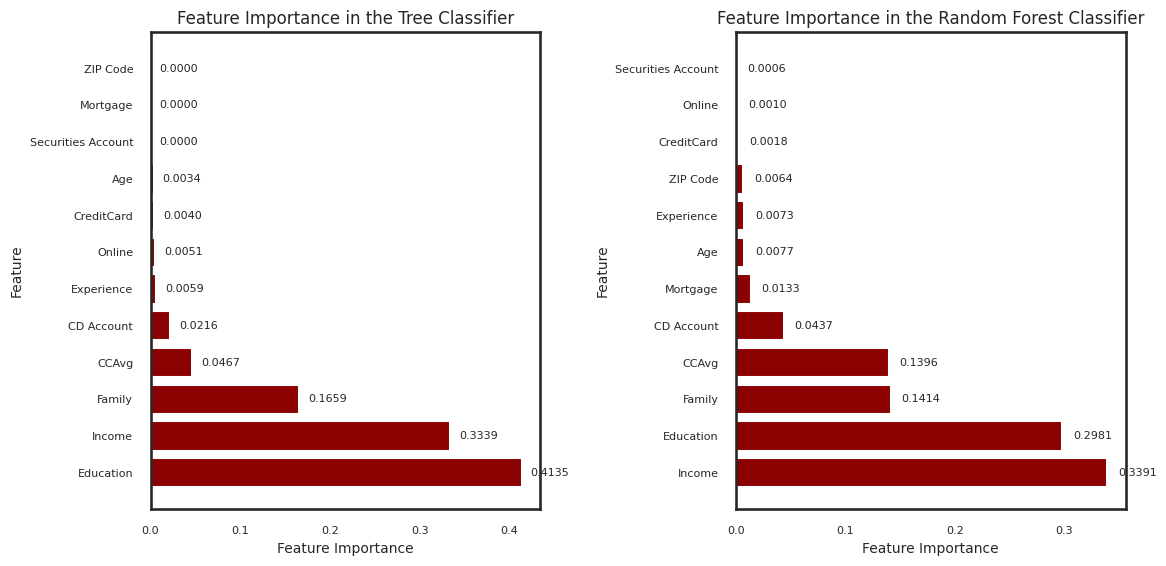

In [ ]:
# Obtenemos los nombres de las características
feature_names = list(X.columns)

# Ordenamos las características por importancia para el árbol de decisión
tree_importances = tree_clf.feature_importances_
tree_indices = np.argsort(tree_importances)[::-1]
sorted_tree_importances = tree_importances[tree_indices]
sorted_tree_features = [feature_names[i] for i in tree_indices]

# Ordenamos las características por importancia para el bosque aleatorio
rnd_importances = rnd.feature_importances_
rnd_indices = np.argsort(rnd_importances)[::-1]
sorted_rnd_importances = rnd_importances[rnd_indices]
sorted_rnd_features = [feature_names[i] for i in rnd_indices]

# Definir el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Primer subplot para el árbol de decisión
plt.subplot(1, 2, 1)
bars = plt.barh(sorted_tree_features, sorted_tree_importances, color='darkred')
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.title('Feature Importance in the Tree Classifier', fontsize=12)
# Añadir los valores numéricos al final de cada barra
for bar, value in zip(bars, sorted_tree_importances):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.4f}', va='center', fontsize=8)

# Ajustamos el tamaño de las etiquetas del eje
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Segundo subplot para el bosque aleatorio
plt.subplot(1, 2, 2)
bars = plt.barh(sorted_rnd_features, sorted_rnd_importances, color='darkred')
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.title('Feature Importance in the Random Forest Classifier', fontsize=12)

# Añadimos los valores numéricos al final de cada barra
for bar, value in zip(bars, sorted_rnd_importances):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.4f}', va='center', fontsize=8)

# Ajustamos el tamaño de las etiquetas del eje
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Ajustamos los gráficos para que no se superpongan
plt.tight_layout()
plt.show()

# 9 Comparación con otros modelos

## Pregunta 09.1 (texto)

`````
Pregunta:

Teniendo en cuenta estos resultados tentativos incluyendo otros modelos:

AUC del Árbol de Decisión (validación cruzada): 0.99 +/- 0.00
AUC del Bosque Aleatorio (validación cruzada): 1.00 +/- 0.00
AUC del Gradient Boosting (validación cruzada): 1.00 +/- 0.00
AUC del XGBoost (validación cruzada): 1.00 +/- 0.00

¿considera que los modelos sobreajustan o considera que hay otros motivos que justifican performances tan altas?.

Justifique su respuesta teniendo en cuenta todo los revisado a lo largo de todo el código.
(Ejemplo:
En el paso x hemos identificado ...
En el paso x hemos identificado ...)



`````



```
# Esto tiene formato de código
```

````
# Respuesta: El sobrejuste o la performance tan alta puede estar dada por la variable target que tiene un 9.6% de valores positivos. Esto quiere decir que los positivos pueden estar explicados por una cierta varianza de los datos dada la poca correlación con la target como puede verse en el paso 3. Se puede ver que hay una diferencia entre las variables explicativas entre los modelos Tree Classifier y Random Forest Classifier, aún cuando hay una poca correlación con la educación y familia, pero estas son escenciales para el modelo. Sin embargo, me parece que el Random Forest Classifier selecciona variables que son más consistentes con la literatura para explicar el modelo. (paso 9)

#Por otro lado, los hiperparámetros que se han establecido ajustan el modelo, pero en buena magnitud dado que el umbral de 0.3 muestra gran performance por el F1 score, de la misma forma con las métricas como puede verse en el paso 7.

# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 6 líneas)
````

# 10 Predicciones

Las predicciones permiten que los modelos aplicados a nuevos datos proporcionen resultados basados en patrones aprendidos. Mediante diversas métricas podemos determinar la efectividad del modelo. Considere que obtiene los siguientes resultados:

## Pregunta 10.1 (texto)

````
Pregunta:
¿De qué manera podría mejorar el modelo SVM en términos de las predicciones obtenidas con respecto a los demás modelos presentados?
````

In [ ]:
# ejecute sin modificar

datos = {
    'Actual': [0, 1, 0],
    'Random Forest Probability': [0.00, 0.95, 0.00],
    'Random Forest Prediction': [0, 1, 0],
    'SVM Probability': [0.02, 0.15, 0.01],
    'SVM Prediction': [0, 0, 0],
    'Logistic Regression Probability': [0.02, 1.00, 0.00],
    'Logistic Regression Prediction': [0, 1, 0]
}

df = pd.DataFrame(datos)
df

,Actual,Random Forest Probability,Random Forest Prediction,SVM Probability,SVM Prediction,Logistic Regression Probability,Logistic Regression Prediction
0,0,0.00,0,0.02,0,0.02,0
1,1,0.95,1,0.15,0,1.00,1
2,0,0.00,0,0.01,0,0.00,0


````
# Respuesta: El modelo SVM no tiene una buena probabilidad en las predicciones de clasificación. Este es un problema causado por una falta de ajuste. Solucionar estas probabilidades es cuestión de los hiperparámetros. Ajustar los hiperparámetros con un aumento de estos puede mejorar el ajuste del modelo. Por ejemplo aumentar el número de hiperplanos. Sin embargo, este modelo no podría acoplarse muy bien a la data porque las variables más importantes presentan muchos valores atípicos. Este modelo puede no ajustarse muy bien a la data de test por ese motivo. Lo máximo que se puede hacer es castigar más a los errores aumentando el hiperparámetro C. Por otro lado, tal vez el kernel no ajuste lo sufienciente al modelo y debería utilizarse un mejor kernel para capturar mejor la varianza así se mejore la probabilidad resultante.

# (no elimine esta celda)

# Escriba el texto correspondiente (máximo 6 líneas)
````